In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### **Que-1**

We use the following equation to solve the linear regression model

given X,y we write the optimization problem as 

\begin{align}
\min_{\beta} \frac{1}{2} ||X\beta - y||^2\\
\beta^* = (X^TX)^{-1}X^Ty
\end{align}

for polynomial regression, same formula will hold, just we change $X$ according to the polynomial equation

In [33]:
def read_regression_file(fn):
    with open(fn, 'r') as f:
        nf, ny = list(map(lambda x: int(x), f.readline().split(" ")))
        dv = []
        for dl in f.readlines()[1:]:
            dl = dl.replace("\n", "").split(",")
            fdl = [float(i) for i in dl]
            dv.append(fdl)
        dv = np.array(dv)
        x, y = dv[:, :nf], dv[:, -ny:]
        return x, y 

def get_weights(X, y):
    nx = X.shape[0]
    oa = np.ones((nx, 1))
    nX = np.concatenate([oa,X], axis = 1)
    wt = np.dot(np.linalg.inv(np.dot(nX.T, nX)), np.dot(nX.T, y))
    return wt

def call_LinReg(x, y):
    wt = get_weights(x,y)
    return wt

def call_PolyLinReg(polynomial, x, y):
    px = polynomial(x[:,0:1], x[:,1:])
    wt = get_weights(px, y)
    return wt    

def train_test_split(x,y, split = 0.85):
    np = x.shape[0]
    npoints = int(split * np)
    return x[:npoints], y[:npoints], x[npoints+1:], y[npoints+1:]

def test_linreg(wts, x):
    xshp = x.shape[0]
    nx = np.concatenate([np.ones((xshp,1)), x], axis=1)
    return nx @ wts

def test_polylinreg(poly, wts, x):
    px = poly(x[:,0:1], x[:,1:])
    npx = np.concatenate([np.ones((px.shape[0],1)), px], axis=1)
    return npx @ wts

p1 = lambda x1, x2: np.concatenate([x1, x2, x1**2, x2**2], axis=1)
p2 = lambda x1, x2: np.concatenate([x1*x2, x1**2, x2**2], axis=1)
p3 = lambda x1, x2: np.concatenate([x1*x2**2, x1**3, x2**2, x1], axis=1)
p4 = lambda x1, x2: np.concatenate([x1*x2, x1**3, x2**3, x1**2, x2**2], axis=1)

file = "lin_regression/regression_data_039.txt"
polyfile = "poly_regression/poly_regression_data_039.txt"

x, y = read_regression_file(file)
px, py = read_regression_file(polyfile)

split = 0.85

trnx, trny, tstx, tsty = train_test_split(x,y, split)
ptrnx, ptrny, ptstx, ptsty = train_test_split(px,py, split)

weights_LR = call_LinReg(trnx, trny)
weights_PLR1 = call_PolyLinReg(p1, ptrnx, ptrny)
weights_PLR2 = call_PolyLinReg(p2, ptrnx, ptrny)
weights_PLR3 = call_PolyLinReg(p3, ptrnx, ptrny)
weights_PLR4 = call_PolyLinReg(p4, ptrnx, ptrny)

test_y_LR = test_linreg(weights_LR, tstx)
test_y_PLR1 = test_polylinreg(p1, weights_PLR1, ptstx)
test_y_PLR2 = test_polylinreg(p2, weights_PLR2, ptstx)
test_y_PLR3 = test_polylinreg(p3, weights_PLR3, ptstx)
test_y_PLR4 = test_polylinreg(p4, weights_PLR4, ptstx)

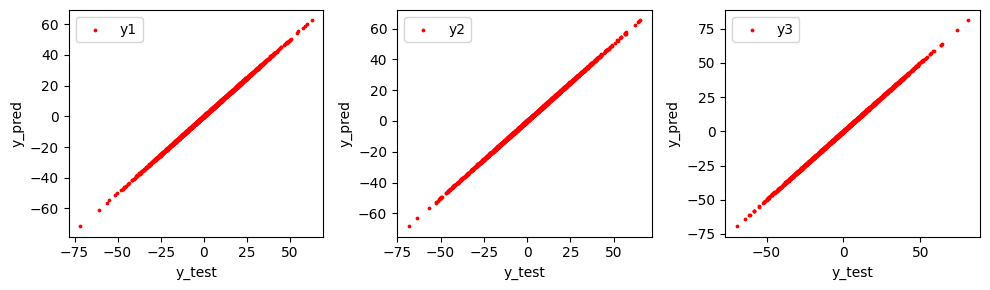

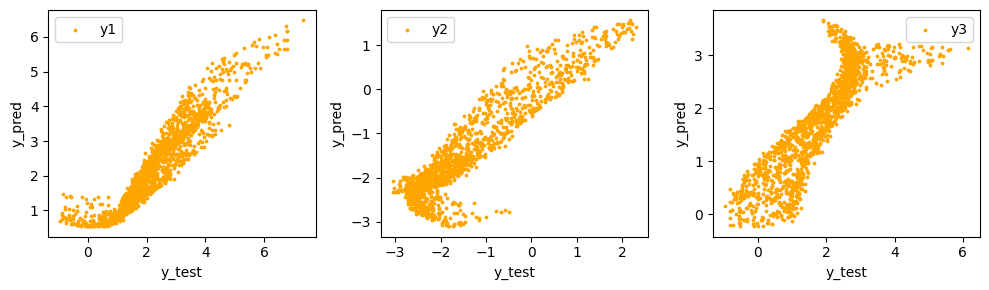

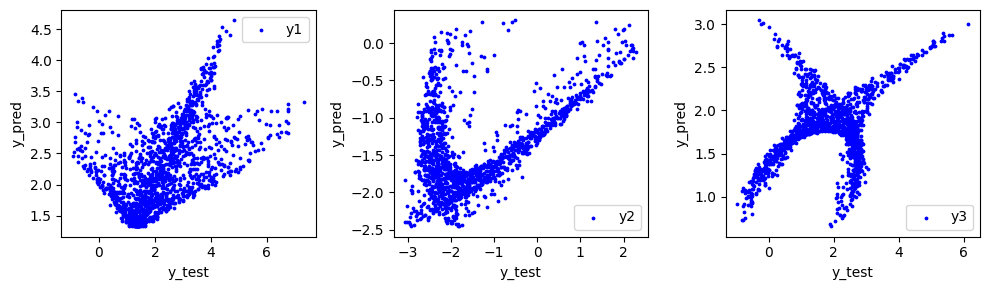

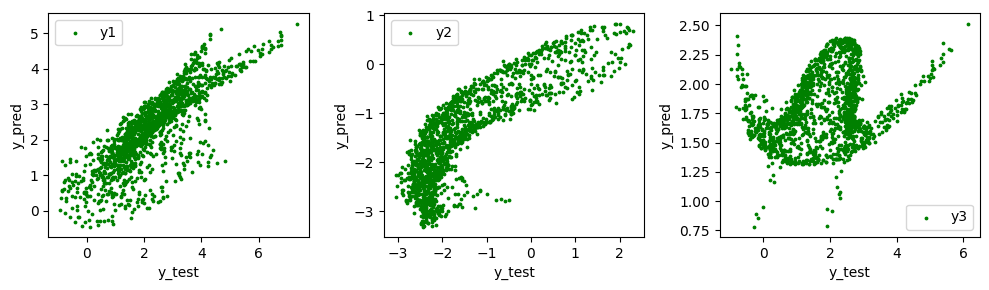

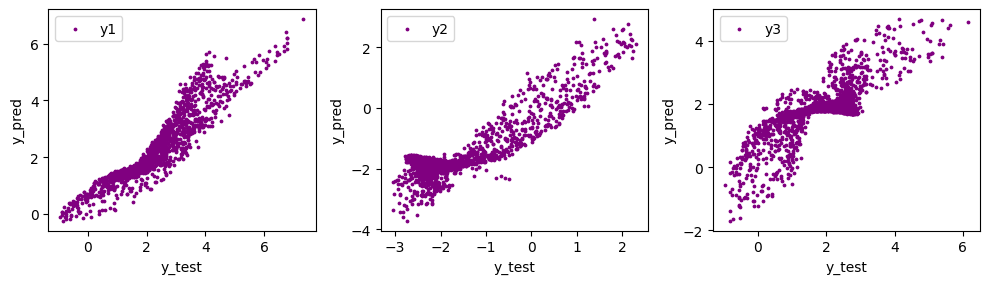

In [40]:
def MSE(x1,x2):
    return np.sum((x1-x2)**2, axis=0) / (x1.shape[0])

def MAE(x1,x2):
    return np.sum(np.abs(x1-x2), axis=0) / (x1.shape[0])

def Corr(y1,y2):
    corr = []
    for i in range(3):
        corr.append(np.corrcoef(y1[:, i], y2[:,i])[0,1])
    return corr

MSE_LR = MSE(test_y_LR, tsty)
MSE_PLR1 = MSE(test_y_PLR1, tsty)
MSE_PLR2 = MSE(test_y_PLR2, tsty)
MSE_PLR3 = MSE(test_y_PLR3, tsty)
MSE_PLR4 = MSE(test_y_PLR4, tsty)


MAE_LR = MAE(test_y_LR, tsty)
MAE_PLR1 = MAE(test_y_PLR1, tsty)
MAE_PLR2 = MAE(test_y_PLR2, tsty)
MAE_PLR3 = MAE(test_y_PLR3, tsty)
MAE_PLR4 = MAE(test_y_PLR4, tsty)

Corr_LR = Corr(test_y_LR, tsty)
Corr_PLR1 = Corr(test_y_PLR1, tsty)
Corr_PLR2 = Corr(test_y_PLR2, tsty)
Corr_PLR3 = Corr(test_y_PLR3, tsty)
Corr_PLR4 = Corr(test_y_PLR4, tsty)


def plot_correlation_plots(tsty, test_y_LR, color='r'):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,3))

    ax[0].scatter(tsty[:,0], test_y_LR[:,0], label='y1', s = 3, c = color)
    ax[1].scatter(tsty[:,1], test_y_LR[:,1], label='y2', s = 3, c = color)
    ax[2].scatter(tsty[:,2], test_y_LR[:,2], label='y3', s = 3, c = color)
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

    ax[0].set_xlabel("y_test")
    ax[0].set_ylabel("y_pred")

    ax[1].set_xlabel("y_test")
    ax[1].set_ylabel("y_pred")

    ax[2].set_xlabel("y_test")
    ax[2].set_ylabel("y_pred")
    fig.tight_layout()

    plt.show()

plot_correlation_plots(tsty, test_y_LR, color='red')
plot_correlation_plots(ptsty, test_y_PLR1, color='orange')
plot_correlation_plots(ptsty, test_y_PLR2, color='blue')
plot_correlation_plots(ptsty, test_y_PLR3, color='green')
plot_correlation_plots(ptsty, test_y_PLR4, color='purple')


In [41]:
print("MSE for Linear Regression for Y1, Y2, Y3")
print(MSE_LR)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P1")
print(MSE_PLR1)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P2")
print(MSE_PLR2)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P3")
print(MSE_PLR3)
print("MSE for Poly Linear Regression for Y1, Y2, Y3 for P4")
print(MSE_PLR4)

print("***************************************")

print("MAE for Linear Regression for Y1, Y2, Y3")
print(MAE_LR)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P1")
print(MAE_PLR1)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P2")
print(MAE_PLR2)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P3")
print(MAE_PLR3)
print("MAE for Poly Linear Regression for Y1, Y2, Y3 for P4")
print(MAE_PLR4)

print("***************************************")

print("Corr for Linear Regression for Y1, Y2, Y3")
print(Corr_LR)
print("Corr for Poly Linear Regression for Y1, Y2, Y3 for P1")
print(Corr_PLR1)
print("Corr for Poly Linear Regression for Y1, Y2, Y3 for P2")
print(Corr_PLR2)
print("Corr for Poly Linear Regression for Y1, Y2, Y3 for P3")
print(Corr_PLR3)
print("Corr for Poly Linear Regression for Y1, Y2, Y3 for P4")
print(Corr_PLR4)

MSE for Linear Regression for Y1, Y2, Y3
[0.03824399 0.04021738 0.0404512 ]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P1
[363.62589737 452.18499079 526.27995276]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P2
[361.70574214 451.67886702 526.48782026]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P3
[362.69652233 451.45592121 525.42194224]
MSE for Poly Linear Regression for Y1, Y2, Y3 for P4
[363.50677534 451.81010393 526.07936421]
***************************************
MAE for Linear Regression for Y1, Y2, Y3
[0.15689249 0.15970043 0.16188441]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P1
[15.13821135 17.01292942 18.47093041]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P2
[15.11458943 16.98194784 18.50304632]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P3
[15.12205416 16.9975628  18.48022272]
MAE for Poly Linear Regression for Y1, Y2, Y3 for P4
[15.14255767 17.00368477 18.48064047]
***************************************
Corr for Linear Regression f

### **Regression with Linear Constraints**

\begin{align}
\min_{\beta} \frac{1}{2} ||X\beta - y||^2\\
A\beta = b\\
f(\beta) = \frac{1}{2} ||X\beta - y||^2 = \frac{1}{2} \beta X^TX \beta - y^TX \beta + \frac{1}{2} y^Ty\\
\nabla f(\beta) = X^TX \beta - X^Ty
\end{align}

we know that for minimization of such problems there exists a $\lambda$ such that $\nabla f(\beta^*) = A^T \lambda$, substituting $\nabla f(\beta^*)$, we get 

\begin{align}
\nabla f(\beta^*) = A^T \lambda \\
X^TX \beta^* - X^Ty = A^T \lambda\\
\end{align}

we also know that $\beta^*$ satisfies the constraint $A \beta^* = b$

solving both the equations we get

\begin{align}
X^TX \beta^* = A^T \lambda + X^Ty\\
\beta^* = (X^TX)^{-1}(A^T \lambda + X^Ty)\\
\end{align}

substituting it in $A \beta^* = b$ we get

\begin{align}
A(X^TX)^{-1}(A^T \lambda + X^Ty) = b\\
A(X^TX)^{-1}A^T \lambda + A(X^TX)^{-1}X^Ty = b\\
\lambda = (A(X^TX)^{-1}A^T)^{-1} (b - A(X^TX)^{-1}X^Ty)
\end{align}

hence once we get $\lambda$, we can get $\beta^*$ using the equation $\beta^* = (X^TX)^{-1}(A^T \lambda + X^Ty)$

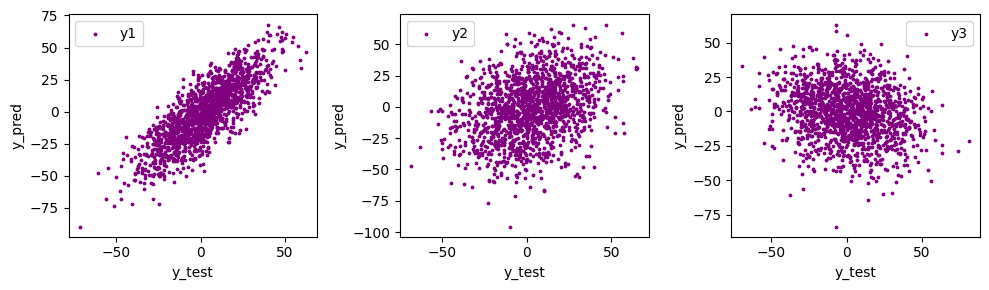

MAE for constraints
[11.14608603 21.19003359 26.1874062 ]
MSE for constraints
[ 195.58276496  705.48115498 1073.28168125]
Corr for constraints
[0.8165503516371283, 0.3222463252732833, -0.19982800233046724]


In [43]:
def read_constraints(file):
    A = []
    bs = []
    with open(file, 'r') as f:
        data = [int(i) for i in f.readline().split(' ')]
        for i in range(data[0]):
            a = [float(i) for i in f.readline().split(',')]
            A.append(a)
        for i in range(data[0]):
            b = float(f.readline())
            bs.append(b)
    return np.array(A), np.array(bs).reshape(-1,1)


A, b = read_constraints('constraints/constraints_039.txt')

def get_wts(X,y,A,b):
    xTxinv = np.linalg.inv(np.dot(X.T, X))
    lambd = np.dot(np.linalg.inv(A @ xTxinv @ A.T), b - np.dot((A @ xTxinv @ X.T), y))
    beta = xTxinv @ (A.T @ lambd + X.T @ y)
    return beta


wts_constr = get_wts(trnx, trny, A, b)
y_pred = tstx @ wts_constr


plot_correlation_plots(tsty, y_pred, color='purple')


print("MAE for constraints")
print(MAE(y_pred, tsty))

print("MSE for constraints")
print(MSE(y_pred, tsty))

print("Corr for constraints")
print(Corr(y_pred, tsty))


### **Que-2**

PCA algorithm is as follows

\begin{align}
X = [x_1, x_2, x_3, ..., x_n] \\
X \in R^{n \times f}, x_i \in R^{n} \\
X = (X - \mu_x)\\
cov(X) = \frac{1}{n} X^TX
\end{align}

we use $X^TX$ in calculating the covariance matrix due to the structure of $X$ where the rows are the data points not columns

choose V to be eigen vectors corresponding to top $k$ eigen values
$$
V = [v_1, v_2, ..., v_k]; V \in R^{f \times k}
$$

we get the reduced data as 

$$
Y = XV
$$

and the reconstuction is given by

$$
Y^{'} = XVV^T
$$


In [2]:
def standardize_data(X):
    mu_x = np.mean(X, axis = 0)
    X = X - mu_x # centering data
    return X, mu_x

def get_CovMat(X):
    npX = X.shape[0]
    cov = np.dot(X.T, X) / (npX)
    return cov 

def compute_pca_eigen(X, n_components):
    cov_mat = get_CovMat(X) 
    eig_val, eig_vec = np.linalg.eigh(cov_mat) # eigh return eigenvalues in sorted order
    components = eig_vec.T[::-1][:n_components].T
    eig_val = eig_val / np.sum(eig_val)
    return components, eig_val[::-1][:n_components]

def PCA(X, n_comp):
    X, mu_x = standardize_data(X)
    components, variance_ratios = compute_pca_eigen(X, n_comp)
    return components, mu_x

def read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv'):
    fdata = pd.read_csv(file)
    data = fdata.values
    x,y = data[:, 1:], data[:, 0]
    return x, y

def reconstruct_images(X, components, mean):
    X = X - mean
    return X @ components @ components.T + mean

def MSE_PCA(I1, I2, axis=None):
    I1 = np.uint8(I1)
    I2 = np.uint8(I2)
    return np.mean((I1 - I2) ** 2, axis=axis)

def PSNR(I1, I2):
    I1 = np.uint8(I1)
    I2 = np.uint8(I2)
    max_value = 255
    mse = MSE_PCA(I1, I2, axis=1)
    mse[mse==0] = np.inf
    return np.mean(20 * np.log10(max_value / (np.sqrt(mse))))

In [124]:
num_comp = [20,80,150,300,400,784]
transforms_mux = []
X, y = read_csv_mnist(file = 'dataset/MNIST_CSV/mnist_train.csv')
for n_comp in num_comp:
    transform, mu_x = PCA(X, n_comp=n_comp)
    transforms_mux.append((transform, mu_x))

In [125]:
outs = []
PSNR_comp_MNIST = []
MSE_comp_MNIST = []
X_x, y_y = read_csv_mnist(file = "dataset/MNIST_CSV/mnist_test.csv")
for transform, mu_x in transforms_mux:
    out = reconstruct_images(X_x, transform, mu_x)
    outs.append(out)
    PSNR_comp_MNIST.append(PSNR(out, X_x))
    MSE_comp_MNIST.append(MSE_PCA(out, X_x))

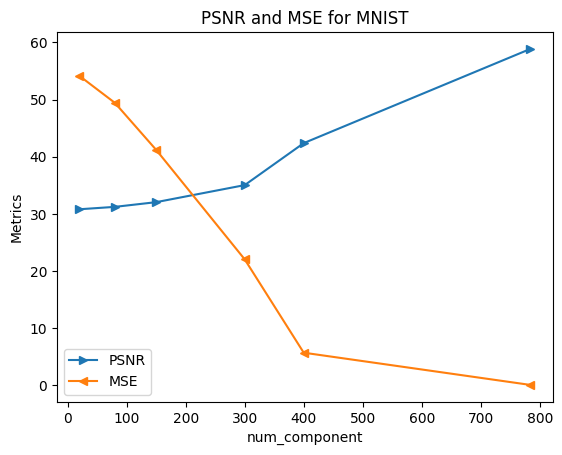

In [126]:
plt.plot(num_comp, PSNR_comp_MNIST, '->' ,label="PSNR")
plt.plot(num_comp, MSE_comp_MNIST, '-<', label="MSE")
plt.xlabel("num_component")
plt.ylabel("Metrics")
plt.title("PSNR and MSE for MNIST")
plt.legend()
plt.show()

In [3]:
def get_index_class(classes, y):
    idxes = []
    for i in range(classes):
        idxes.append((np.where(y == i)[0][0], i))
    return idxes

def plot_row(ax, X, row, classes, img_size):
    for col in range(classes):
        cur_x = X[col].reshape(img_size)
        if cur_x.shape[-1] != 3:
            cur_x[cur_x < 0] = 0.0
        ax[row][col].imshow(np.uint8(cur_x), cmap='gray' if cur_x.shape[-1]!=3 else None)
        # ax[row][col].set_axis_off()
        ax[row][col].axis("off")

def get_sel_images(RX, idxes):
    RXF = []
    for idx, cls in idxes:
        RXF.append(RX[idx,:])
    return RXF

def plot_imgs(ax, RX, row, idxes, classes=10, img_size=(28,28)):
    RXF = get_sel_images(RX, idxes)
    plot_row(ax, RXF, row, classes, img_size)

def plot_images_pca(X_x, y_y, outs, num_comp, classes, img_size):
    idxes = get_index_class(10, y_y)
    fig,ax = plt.subplots(nrows = len(num_comp) + 1, ncols = classes, figsize=(10,8))
    row = 0
    plot_imgs(ax, X_x, row, idxes, classes=classes, img_size=img_size)
    row += 1
    for out in outs:
        plot_imgs(ax, out, row, idxes, classes=classes, img_size=img_size)
        row += 1

    for i in range(classes):
        ax[0][i].set_title(f"class: {i}")

    for i in range(len(num_comp)):
        for j in range(classes):
            ax[i+1][j].set_title(f"NC: {num_comp[i]}")
    fig.tight_layout()
    plt.show()

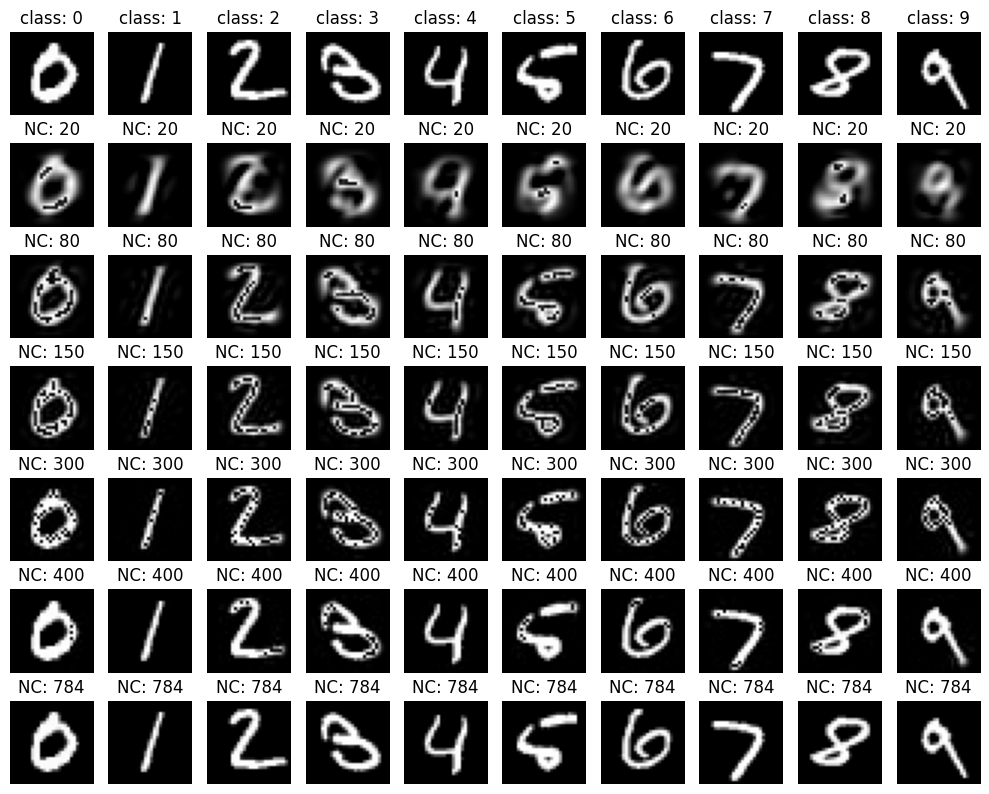

In [128]:
plot_images_pca(X_x, y_y, outs, num_comp, 10, (28,28))

In [5]:
import os, pickle 
def read_cifar10(dataset = "dataset/cifar-10-batches-py"):
    data_files = [f'data_batch_{i}' for i in range(1,6)]
    x = []
    y = []
    for fl in data_files:
        with open(os.path.join(dataset, fl), "rb") as f:
            data1 = pickle.load(f, encoding='bytes')
            x.append(data1[b'data'])
            y.extend(data1[b'labels'])
    
    x = np.vstack(x)
    y = np.array(y)
    x = x.reshape(-1, 3, 32, 32).transpose(0,2,3,1).reshape(-1,32*32*3)
    return x, y 

def read_cifar10_test(dataset='dataset/cifar-10-batches-py'):
    with open(os.path.join(dataset, "test_batch"), "rb") as f:
        data1 = pickle.load(f, encoding='bytes')
        x = data1[b'data']
        y = np.array(data1[b'labels'])
    x = x.reshape(-1, 3, 32, 32).transpose(0,2,3,1).reshape(-1,32*32*3)
    return x, y

trnx, trny = read_cifar10()
tstx, tsty = read_cifar10_test()

In [6]:
num_comp = [100,200,500,1000,2000,3000]
transforms_mux = []
X, y = read_cifar10()
for n_comp in num_comp:
    transform, mu_x = PCA(X, n_comp=n_comp)
    transforms_mux.append((transform, mu_x))

In [7]:
outs = []
PSNR_comp_CIFAR = []
MSE_comp_CIFAR = []
X_x, y_y = read_cifar10_test()
X_x = X_x[:1000, :]
y_y = y_y[:1000]
for transform, mu_x in transforms_mux:
    out = reconstruct_images(X_x, transform, mu_x)
    outs.append(out)
    PSNR_comp_CIFAR.append(PSNR(out, X_x))
    MSE_comp_CIFAR.append(MSE_PCA(out, X_x))

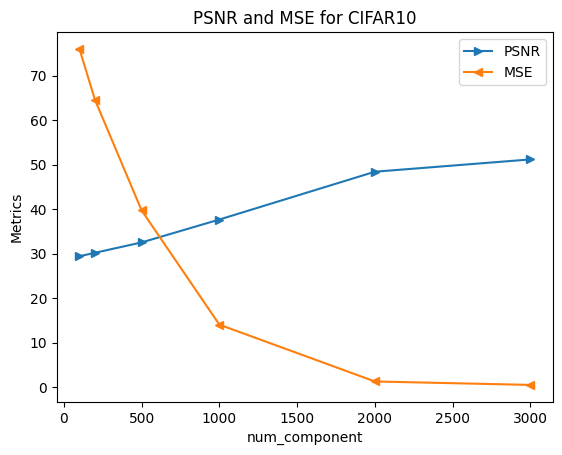

In [132]:
plt.plot(num_comp, PSNR_comp_CIFAR, '->' ,label="PSNR")
plt.plot(num_comp, MSE_comp_CIFAR, '-<', label="MSE")
plt.xlabel("num_component")
plt.ylabel("Metrics")
plt.title("PSNR and MSE for CIFAR10")
plt.legend()
plt.show()

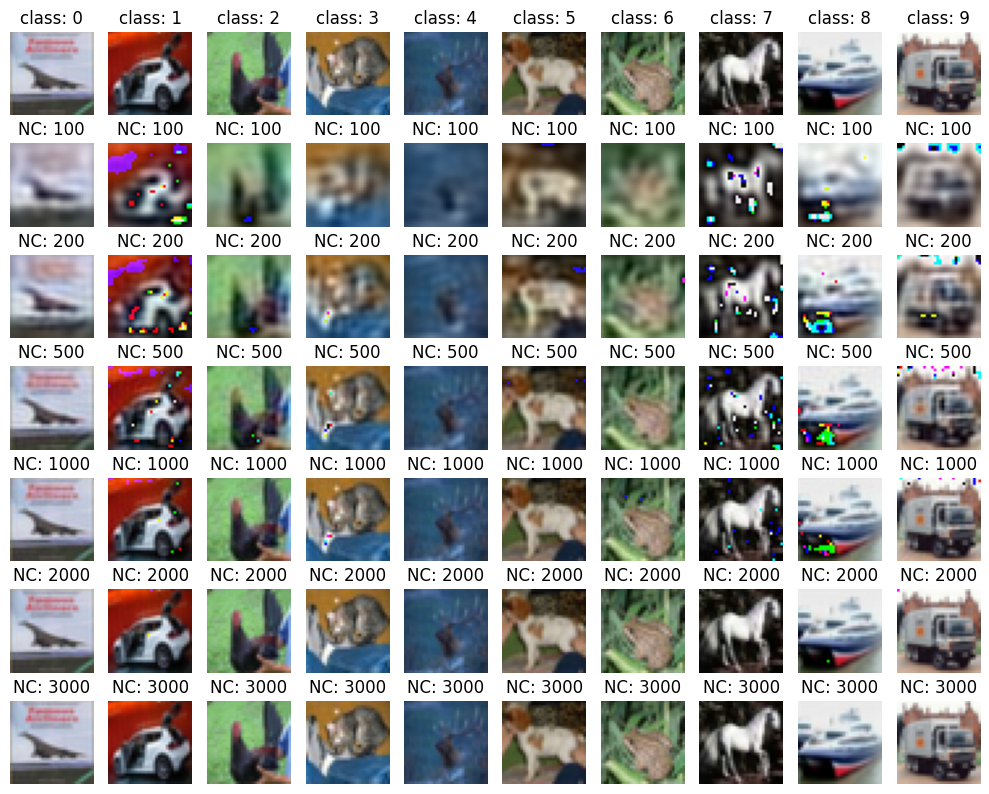

In [8]:
plot_images_pca(X_x, y_y, outs, num_comp, 10, (32,32,3))

### **Que-3**


pi for direct solution
[0.00937489 0.00944793 0.00998209 0.01017119 0.01017679 0.00972469
 0.00984016 0.00938314 0.01047714 0.00973372 0.01008606 0.00978657
 0.01039786 0.00972063 0.00974003 0.0100195  0.00997961 0.01034062
 0.0103219  0.01050571 0.01170193 0.01068776 0.00979445 0.01017465
 0.0107559  0.00909371 0.01022131 0.0104541  0.00973732 0.00998017
 0.0090765  0.00904024 0.01088522 0.01051663 0.00978075 0.01021857
 0.00988816 0.01126115 0.01073018 0.01000963 0.01046304 0.00935445
 0.01008195 0.00957682 0.00921279 0.00998332 0.01017226 0.01053189
 0.00991004 0.01022458 0.0098065  0.00939471 0.00959452 0.01018737
 0.01112627 0.0088109  0.01042946 0.01032912 0.00973928 0.00947477
 0.00894792 0.00965636 0.0097948  0.01127456 0.01013604 0.00945404
 0.00869571 0.01036753 0.0105245  0.00976544 0.01035622 0.0106157
 0.01099981 0.00970599 0.00907504 0.01054684 0.00939195 0.01022548
 0.01014594 0.00980806 0.00932678 0.00945551 0.01034288 0.01047293
 0.00926673 0.01022868 0.00988311 0.0092

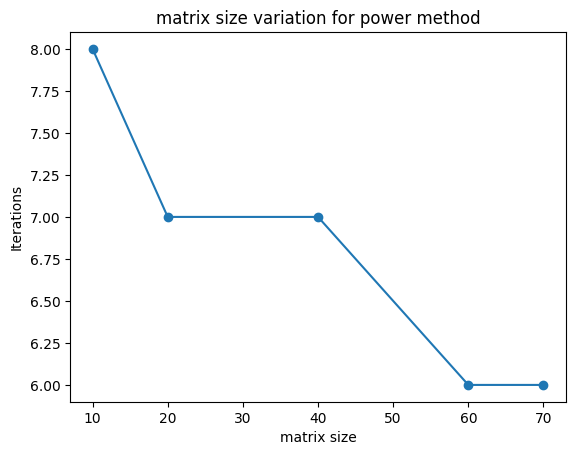

In [15]:
import time 

def load_TMat(file="transition_matrices/P_038.txt"):
    fd = []
    with open(file, 'r') as f:
        for line in f.readlines():
            fd.append(list(map(lambda x: float(x), line.replace("\n","").split(" "))))
    return np.array(fd)

def get_SD(P):
    t1 = time.time()
    N = P.shape[0]
    A = np.transpose(P) - np.eye(N)
    
    A[-1] = np.ones(N)
    b = np.zeros(N)
    b[-1] = 1
    pi = np.linalg.solve(A, b)
    t2 = time.time()
    return pi, t2-t1

def power_method(mat):
    t1 = time.time()
    piT = np.random.randn(1, mat.shape[0])
    piT = np.exp(piT)
    piT = piT / np.sum(piT)
    epsilon = 1e-6
    T = 0
    while True:
        T += 1
        opiT = piT
        piT = np.dot(piT, mat)
        if np.linalg.norm(piT - opiT) < epsilon:
            break 
    t2 = time.time()
    return piT, T, t2-t1

def mat_variation(mat):
    size = [10, 20, 40, 60, 70]
    power_T = []
    for sz in size:
        nmat = mat[:sz, :sz]
        normal_mat = nmat / np.sum(nmat, axis=1).reshape(-1,1)
        piT, T, Pt = power_method(normal_mat)
        power_T.append(T)
    plt.plot(size, power_T, marker = "o")
    plt.xlabel("matrix size")
    plt.ylabel("Iterations")
    plt.title("matrix size variation for power method")
    plt.show()

mat = load_TMat()
pi_d, SDt = get_SD(mat)
pi, T, Pt = power_method(mat)

print("pi for direct solution")
print(pi_d)

print('pi for power method')
print(pi)

print(f"execution time of direct method: {SDt:.5f}")
print(f"execution time of power method: {Pt:.5f}")

print(f"Iterations for convergence of power method: {T}")

print(f"||piTP - piT||: {np.linalg.norm(pi.reshape(-1,1).T @ mat - pi.reshape(-1,1)):.5f}")
print(f"sum_pi: {np.sum(pi):.5f}")

mat_variation(mat)

### **Que-4**

In [5]:
import time

def read_matrix(file="OneDrive_1_30-10-2024/matrix_039.txt"):
    mat = []
    with open(file, 'r') as f:
        for line in f.readlines():
            line = list(map(
                lambda x: float(x), 
                line.replace("\n", "").replace("\t", " ").split(" ")
            ))
            mat.append(line)
    mat = np.array(mat)
    return mat 

def power_iteration(G, NIter):
    t1 = time.perf_counter()
    sigmas = []
    u = np.random.rand(G.shape[1])
    for i in range(NIter):
        Gu = np.dot(G,u)
        v = Gu / np.linalg.norm(Gu)
        GTv = np.dot(G.T, v)
        u = GTv / np.linalg.norm(GTv)
        sigma = np.dot(np.dot(G,u).T, v)
        sigmas.append(sigma)
    t2 = time.perf_counter()
    return sigmas, t2 - t1

def Gram_iteration(G, NIter):
    t1 = time.perf_counter()
    r = 0
    m,n = G.shape
    if n > m:
        G = G.T 
    sigmas = []
    for i in range(NIter):
        Gf = np.linalg.norm(G)
        r = 2 * (r + np.log(Gf))
        G = G / Gf 
        G = np.dot(G.T, G)
        sigma = (np.linalg.norm(G)**(- 2 * NIter)) * np.exp(2 ** (-NIter) * r)
        sigmas.append(sigma)
    t2 = time.perf_counter()
    return sigmas, t2 - t1 

In [6]:
matrix = read_matrix("OneDrive_1_30-10-2024/matrix_038.txt")

svdG = np.linalg.svd(matrix)

s_ref = svdG[1][0]

sigmas_power = []
sigmas_gramit = []

atp = 0 
atg = 0
N = 100

for i in range(N):
    sigmaps, timep = power_iteration(matrix, 2000)
    sigmags, timeg = Gram_iteration(matrix, 15)
    atp += timep / N
    atg += timeg / N 
    sigmas_power.append(sigmaps)
    sigmas_gramit.append(sigmags)

print(f"average time for power method: {atp:.3f}, gram iteration: {atg:.3f}") 


average time for power method: 0.786, gram iteration: 0.030


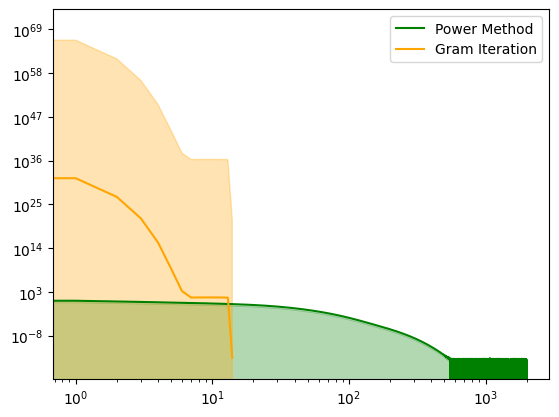

In [7]:
def get_abs_diff(sigmas_power, sigmas_gramit, v, s_ref):
    p_iters = np.array(sigmas_power[v])
    g_iters = np.array(sigmas_gramit[v])

    p_iters = np.abs(s_ref - p_iters)
    g_iters = np.abs(s_ref - g_iters)
    return p_iters, g_iters

p_iters, g_iters = get_abs_diff(sigmas_power, sigmas_gramit, 4, s_ref)

iter_p = [i for i in range(len(p_iters))]
iter_g = [i for i in range(len(g_iters))]
plt.plot(iter_p, p_iters, label="Power Method", color = 'green')
plt.plot(iter_g, g_iters, label='Gram Iteration', color = 'orange')

mup, stdp = np.mean(p_iters), np.std(p_iters)
mug, stdg = np.mean(g_iters), np.std(g_iters)

plt.fill_between(iter_p, p_iters * (mup - stdp) , p_iters * (mup + stdp), color = 'green', alpha = 0.3)
plt.fill_between(iter_g, g_iters * (mug - stdg), g_iters * (mug + stdg), color = 'orange', alpha = 0.3)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

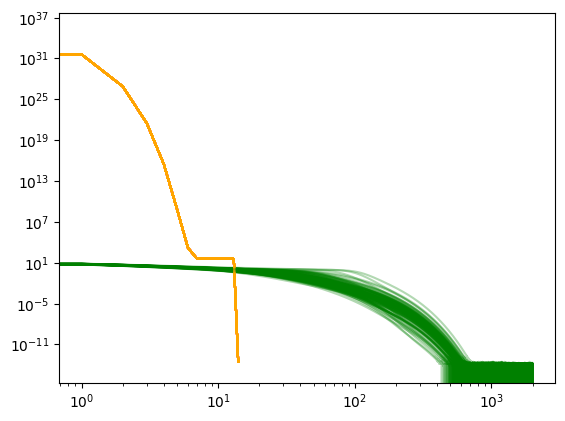

In [8]:
for i in range(100):
    p_iters, g_iters = get_abs_diff(sigmas_power, sigmas_gramit, i, s_ref)
    plt.plot([j for j in range(len(p_iters))], p_iters, color="green",alpha=0.3, label = "Power Method")
    plt.plot([j for j in range(len(g_iters))], g_iters, color="orange",alpha=0.3, label="Gram Iteration")
plt.xscale("log")
plt.yscale("log")
plt.show()


#### **To find $\lambda_{max}$**

we know that for symmetric matrix, $\sigma_1$ and $|\lambda_{max}|$ are same

- We again find $\sigma_1$
- shift the matrix as follows $M / \sigma_1 + \sigma_1 I$
- Then we apply power Iteration to again find $\sigma$ largest singular value
- and then the eigen value can be found by $(\lambda_{max} / \sigma_1 + \sigma_1 - \sigma_1) \sigma_1 = \lambda_{max}$

#### **To find $\lambda_{min}$**

The algorithm is as follows 

- We first shift all eigen values by largest singular value ($\sigma_1 = |\lambda_{max}|$). To do this shift we do $M - |\lambda_{max}| I$
- The singular value of shifted matrix are $|\lambda_i - \sigma_1|$
- Hence the largest $\sigma$ in magnitude will be $|\lambda_{min} - \sigma_1|$ (apply power iteration)
- Finally we remove the shift i.e. $\sigma_1 - |\lambda_{min} - \sigma_1|  = sign(\lambda_{min}) \lambda_{min}$

since $\lambda_{min} \le \sigma_1 \implies |\lambda_{min} - \sigma_1| = \sigma_1 - \lambda_{min} \implies \sigma_1 - |\lambda_{min} - \sigma_1| = \lambda_{min}$ with sign 




In [ ]:
shift_matrix = lambda M, mu: M - mu * np.identity(M.shape[0])
RMS = np.array([[4,1,2],[1,3,0],[2,0,2]])
sing, T = power_iteration(RMS, 3000)
NM = shift_matrix(RMS, sing[-1])
new_sig,_ = power_iteration(NM,3000) 
print(sing[-1] - new_sig[-1])
print(np.linalg.eigh(RMS)[0])

0.6385312338141738
[0.63853123 2.83255081 5.52891796]


In [ ]:
RMS = np.array([[4,1,2],[1,3,0],[2,0,2]])
get_shift_matrix = lambda M, mu: (M/mu) + mu * np.eye(M.shape[0])
SP, _ = power_iteration(RMS,3000)
new_mat = get_shift_matrix(RMS,SP[-1])
new_sig,_ = power_iteration(new_mat,9000) 
print(f'{((new_sig[-1] - SP[-1])*SP[-1]):.4f}')
print(np.linalg.eigh(RMS)[0])

5.5289
[0.63853123 2.83255081 5.52891796]
